In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd # handle the data
from sklearn.model_selection import train_test_split # split the data

from sklearn import metrics # evaluation metrics
import seaborn as sn # plotting the data
import matplotlib.pyplot as plt # plotting the data

**Importing the dataset**

In [3]:
df=pd.read_csv('Social_Network_Ads.csv')

In [4]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
df.shape

(400, 5)

In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df.describe()


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


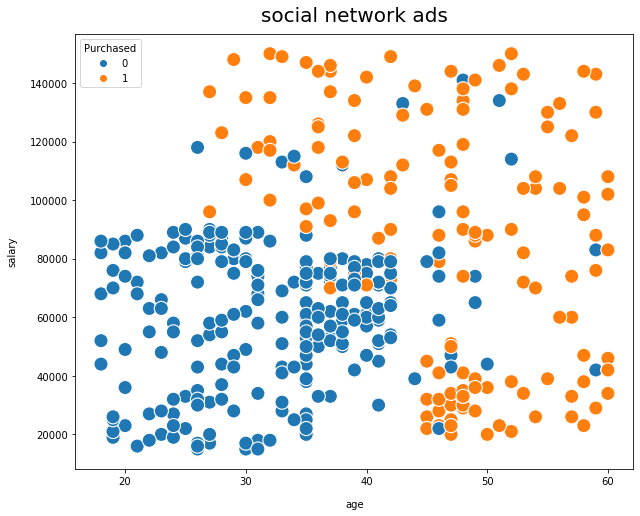

In [9]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df, s=200)
plt.title("social network ads", y=1.015, fontsize=20)
plt.xlabel("age", labelpad=13)
plt.ylabel("salary", labelpad=13)
ax = plt.gca()

In [10]:
del df['User ID']

In [11]:
df['Gender']=df['Gender'].map({'Male':1,"Female":0})

In [12]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [13]:
X = df[['Gender', 'Age','EstimatedSalary']].values # fts
y = df['Purchased'].values # target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0) # train- test split

**Feature Scaling**

In [14]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(X_train) # find the values of mu and sigma
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

In [15]:
X_train.shape

(300, 3)

**Fitting Decision Tree Classification to the Training set**

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth 
dt = DecisionTreeClassifier()

# Fit dt to the training set
dt.fit(X_train, y_train) # it will ask all possible questions, compute the information gain and choose the best split

# Predict test set labels
y_pred = dt.predict(X_test)
y_pred
#print(y_pred[0:5])

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

**Predicting the Test set results**

In [17]:
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

Test set accuracy: 0.91
Test set auc: 0.90


C:\Users\chandru\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


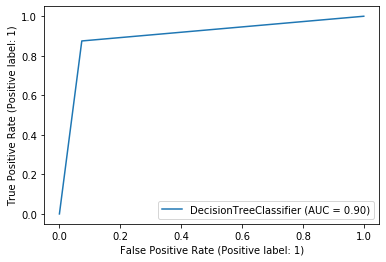

In [18]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
y_pred = dt.predict(X_test) 

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc))
plot_roc_curve(dt, X_test, y_test)

In [19]:
k=pd.DataFrame(y_test,columns=['Y_test'])
k2=pd.DataFrame(y_pred,columns=['Y_pred'])
final=pd.concat((k,k2),axis=1)
final

,Y_test,Y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,1
96,0,0
97,1,1
98,1,1


**Making the Confusion Matrix**

In [20]:
from sklearn.metrics import confusion_matrix
y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[63,  5],
       [ 4, 28]], dtype=int64)

Text(42.0, 0.5, 'Truth')

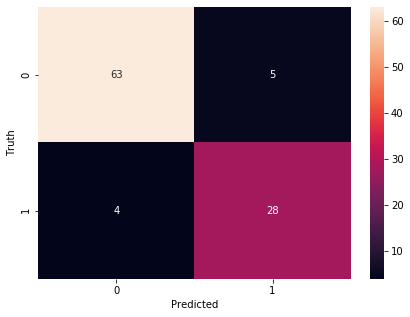

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [22]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

def plot_labeled_decision_regions(X,y, models):
    '''Function producing a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
    
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers 
    
    '''
    if len(models) != 2:
        raise Exception('''Models should be a list containing only two trained classifiers.''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''X has to be a pandas DataFrame with two numerical features.''')
    if not isinstance(y, pd.Series):
        raise Exception('''y has to be a pandas Series corresponding to the labels.''')
    fig, ax = plt.subplots(1, 2, figsize=(10.0, 5), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values, y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
            ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
            ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()

ValueError: Filler values must be provided when X has more than 2 training features.

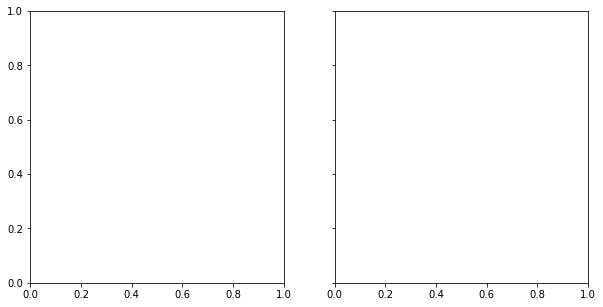

In [23]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
clfs = dt
fig, ax = plt.subplots(1, 2, figsize=(10.0, 5), sharey=True)
plot_decision_regions(X, y,dt,legend= 2, ax = ax)
ax[i].set_title(model.__class__.__name__)
ax[i].set_xlabel(X.columns[0])
ax[i].set_ylabel(X.columns[1])
ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
plt.tight_layout()

In [24]:
clfs = [dt]

# Review the decision regions of the two classifier
plot_labeled_decision_regions(X_test, y_test, clfs)

Exception: Models should be a list containing only two trained classifiers.

**Visualising the Training set results**

In [25]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [26]:
clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

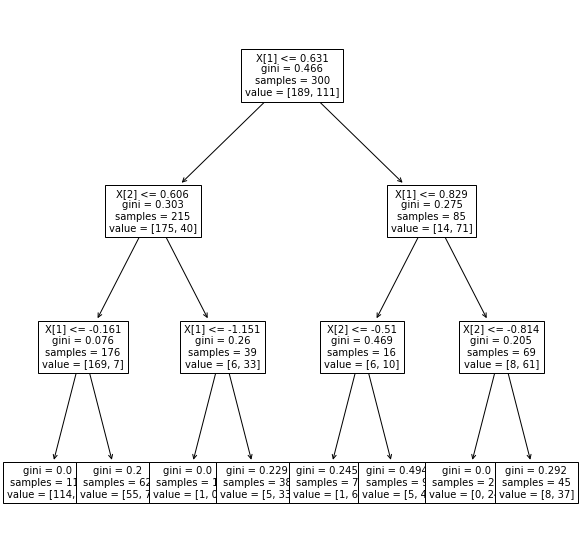

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clf_tree, fontsize=10)
plt.show()

**Visualising the Test set results**

[Text(0.46283783783783783, 0.9583333333333334, 'X[1] <= 0.631\ngini = 0.466\nsamples = 300\nvalue = [189, 111]'),
 Text(0.22297297297297297, 0.875, 'X[2] <= 0.606\ngini = 0.303\nsamples = 215\nvalue = [175, 40]'),
 Text(0.12162162162162163, 0.7916666666666666, 'X[1] <= -0.161\ngini = 0.076\nsamples = 176\nvalue = [169, 7]'),
 Text(0.0945945945945946, 0.7083333333333334, 'gini = 0.0\nsamples = 114\nvalue = [114, 0]'),
 Text(0.14864864864864866, 0.7083333333333334, 'X[2] <= 0.403\ngini = 0.2\nsamples = 62\nvalue = [55, 7]'),
 Text(0.12162162162162163, 0.625, 'X[2] <= -0.06\ngini = 0.153\nsamples = 60\nvalue = [55, 5]'),
 Text(0.0945945945945946, 0.5416666666666666, 'gini = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(0.14864864864864866, 0.5416666666666666, 'X[2] <= 0.027\ngini = 0.285\nsamples = 29\nvalue = [24, 5]'),
 Text(0.12162162162162163, 0.4583333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.17567567567567569, 0.4583333333333333, 'X[2] <= 0.259\ngini = 0.245\nsamp

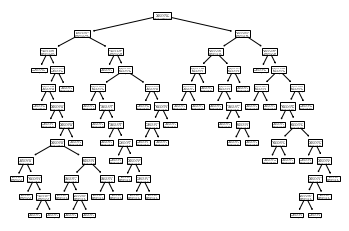

In [28]:
from sklearn import tree
tree.plot_tree(dt)